<a href="https://colab.research.google.com/github/sinharashi14/disease_detection/blob/main/disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# Install necessary libraries
!pip install tensorflow scikit-learn matplotlib seaborn

In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# 1. Load the dataset
from io import StringIO

In [36]:
data = """
Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
3,78,50,32,88,31.0,0.248,26,1
10,115,0,0,0,35.3,0.134,29,0
2,197,70,45,543,30.5,0.158,53,1
8,125,96,0,0,29.0,0.232,54,1
4,110,92,0,0,37.6,0.191,30,0
10,168,74,0,0,38.0,0.537,40,1
10,139,80,0,0,27.1,1.441,24,0
1,189,60,23,846,30.1,0.398,59,1
5,166,72,19,175,25.8,0.587,51,1
7,118,84,47,230,45.8,0.551,31,1
1,105,66,15,0,24.2,0.223,22,0
1,100,72,19,0,36.4,0.258,28,0
3,158,66,0,0,28.0,0.498,45,1
9,131,64,23,0,36.6,0.254,52,1
3,101,72,0,0,32.9,0.589,39,0
8,115,66,29,0,35.1,0.169,48,1
7,196,90,0,0,39.0,0.254,41,0
9,119,80,35,0,29.0,0.469,42,1
11,168,74,0,0,38.5,0.305,43,1
7,121,80,35,0,28.0,0.351,44,1
13,144,82,0,0,32.4,0.446,37,1
4,125,96,0,0,30.5,0.259,50,1
3,144,66,21,0,32.0,0.231,24,0
2,93,64,32,160,38.0,0.674,23,0
4,129,86,20,270,35.5,0.231,28,1
6,114,88,0,0,27.8,0.247,66,0
0,102,78,40,90,34.5,0.238,24,0
9,143,94,33,146,36.6,0.254,51,1
2,123,48,32,165,42.1,0.520,26,1
10,150,70,30,150,35.0,0.689,55,1
10,168,74,0,0,38.0,0.537,40,1
10,139,80,0,0,27.1,1.441,24,0
1,189,60,23,846,30.1,0.398,59,1
5,166,72,19,175,25.8,0.587,51,1
7,118,84,47,230,45.8,0.551,31,1
1,105,66,15,0,24.2,0.223,22,0
1,100,72,19,0,36.4,0.258,28,0
3,158,66,0,0,28.0,0.498,45,1
9,131,64,23,0,36.6,0.254,52,1
3,101,72,0,0,32.9,0.589,39,0
8,115,66,29,0,35.1,0.169,48,1
7,196,90,0,0,39.0,0.254,41,0
9,119,80,35,0,29.0,0.469,42,1
11,168,74,0,0,38.5,0.305,43,1
6,114,88,0,0,27.8,0.247,66,0
0,102,78,40,90,34.5,0.238,24,0
9,143,94,33,146,36.6,0.254,51,1
2,123,48,32,165,42.1,0.520,26,1
10,150,70,30,150,35.0,0.689,55,1
5,133,88,25,204,36.0,0.268,35,1
1,91,64,24,0,29.2,0.192,21,0
8,153,78,32,150,33.6,0.650,42,1
6,125,68,30,120,30.0,0.460,35,0
4,141,74,0,0,27.6,0.244,40,1
7,174,88,37,120,44.2,0.646,45,1
2,97,70,38,0,33.2,0.327,22,0
9,122,56,0,0,33.3,1.114,33,1
3,112,80,15,0,35.2,0.278,28,0
1,109,60,8,182,25.4,0.947,21,0
5,147,78,0,0,33.7,0.218,65,1
2,90,60,0,0,23.5,0.191,25,0
6,134,70,23,130,35.4,0.542,29,1
3,102,74,0,0,29.9,0.368,26,0
8,152,78,32,0,34.2,0.893,45,1
5,129,80,35,150,33.1,0.356,31,0
2,110,74,29,125,32.4,0.698,27,0
9,146,80,35,190,33.7,0.687,44,1
7,129,80,37,210,39.9,0.569,41,1
3,118,64,23,89,32.3,0.498,30,0
6,159,80,35,180,38.1,0.655,43,1
2,92,62,28,120,31.0,0.210,23,0
5,160,74,34,140,34.9,0.376,41,1
0,99,72,27,0,25.2,0.253,21,0
8,167,84,30,120,32.5,0.839,45,1
3,120,70,28,150,34.0,0.285,29,0
4,155,84,32,200,36.6,0.627,43,1
7,130,90,30,170,39.1,0.734,50,1
2,96,68,27,87,24.2,0.294,21,0
10,175,88,35,200,37.6,0.639,49,1
1,88,62,28,0,25.3,0.190,23,0
9,172,78,32,150,33.9,0.588,41,1
6,108,72,30,95,32.4,0.344,32,0
11,185,82,30,150,35.0,0.682,42,1
4,117,64,25,120,27.5,0.183,26,0
7,156,88,32,150,34.9,0.543,43,1
5,128,72,27,150,32.0,0.415,34,0
9,170,84,35,200,36.5,0.765,47,1
3,105,60,24,0,24.3,0.187,22,0
8,190,90,35,200,39.5,0.787,50,1
2,100,70,25,90,28.1,0.305,25,0
6,140,80,32,150,36.1,0.582,38,1
1,95,66,13,38,19.6,0.334,25,0
10,125,70,26,115,31.1,0.205,41,1
4,130,82,28,185,34.3,0.505,32,1
7,179,90,35,120,38.2,0.665,37,1
0,88,60,22,76,23.1,0.220,23,0
9,180,72,27,150,35.5,0.313,36,1
3,111,62,13,182,24.0,0.138,23,0
7,121,80,35,0,28.0,0.351,44,1
13,144,82,0,0,32.4,0.446,37,1
4,125,96,0,0,30.5,0.259,50,1
3,144,66,21,0,32.0,0.231,24,0
2,93,64,32,160,38.0,0.674,23,0
4,129,86,20,270,35.5,0.231,28,1
5,133,88,25,204,36.0,0.268,35,1
1,91,64,24,0,29.2,0.192,21,0
8,153,78,32,150,33.6,0.650,42,1
6,125,68,30,120,30.0,0.460,35,0
4,141,74,0,0,27.6,0.244,40,1
7,174,88,37,120,44.2,0.646,45,1
2,97,70,38,0,33.2,0.327,22,0
9,122,56,0,0,33.3,1.114,33,1
3,112,80,15,0,35.2,0.278,28,0
1,109,60,8,182,25.4,0.947,21,0
5,147,78,0,0,33.7,0.218,65,1
2,90,60,0,0,23.5,0.191,25,0 """

In [37]:
# Use StringIO to read the CSV data directly into pandas DataFrame
data = pd.read_csv(StringIO(data))

# Display the first few rows of the dataset
data.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [38]:
# 2. Data Preprocessing
# Split into features (X) and target (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']



In [39]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data for better performance (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [40]:
# 3. Build the ANN Model (Multi-Layer Perceptron)
model = Sequential()

# Add input layer with 8 nodes (one for each feature)
model.add(Dense(12, input_dim=X_train_scaled.shape[1], activation='relu'))

# Add hidden layer with 8 nodes
model.add(Dense(8, activation='relu'))

# Add output layer with 1 node (binary classification: 0 or 1)
model.add(Dense(1, activation='sigmoid'))



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
# 4. Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 5. Train the Model
history = model.fit(X_train_scaled, y_train, epochs=5, batch_size=10, validation_data=(X_test_scaled, y_test), verbose=1)



Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.2143 - loss: 0.8230 - val_accuracy: 0.4400 - val_loss: 0.7136
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2360 - loss: 0.7932 - val_accuracy: 0.4800 - val_loss: 0.6916
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4040 - loss: 0.7520 - val_accuracy: 0.5600 - val_loss: 0.6723
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4463 - loss: 0.7370 - val_accuracy: 0.6800 - val_loss: 0.6563
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3950 - loss: 0.7225 - val_accuracy: 0.7200 - val_loss: 0.6417


In [42]:
# 6. Evaluate the Model on Test Data
y_pred = (model.predict(X_test_scaled) > 0.5)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test data: {accuracy * 100:.2f}%')



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Accuracy on test data: 72.00%


In [43]:
# 7. Confusion Matrix and Classification Report
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))




Confusion Matrix:
[[ 4  6]
 [ 1 14]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.40      0.53        10
           1       0.70      0.93      0.80        15

    accuracy                           0.72        25
   macro avg       0.75      0.67      0.67        25
weighted avg       0.74      0.72      0.69        25



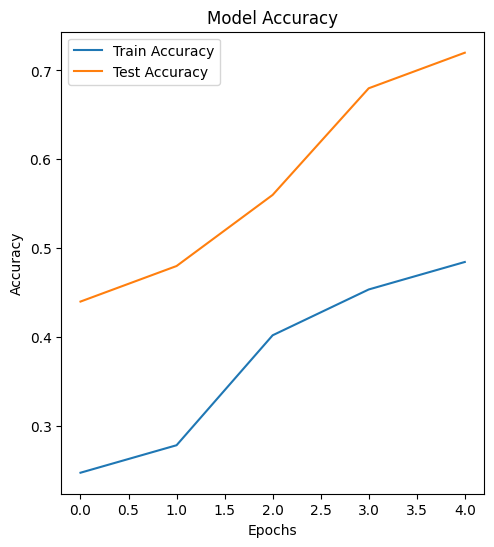

In [44]:
# 8. Plot Accuracy and Loss Curves
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()



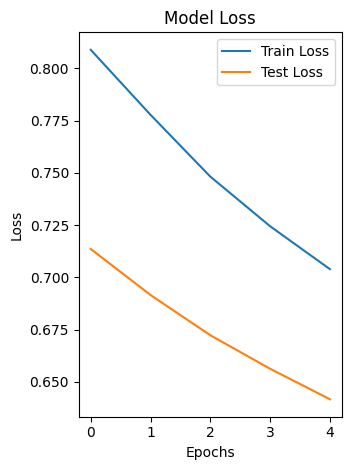

Model saved as 'diabetes_ann_model.h5'


In [45]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# 9. Save the Model
model.save('diabetes_ann_model.h5')
print("Model saved as 'diabetes_ann_model.h5'")